<a href="https://colab.research.google.com/github/bysubanji/Exploratory-Data-Analysis-of-churn-dataset/blob/main/NYC_Taxi_trip_time_Prediction_Bhaskarsubanji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project  : NYC Taxi trip duration Prediction :: Predicting total ride duration of taxi trips in NYC using the given Dataset

Problem Description
Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.


## <b> Description of Data </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the performing this project.
###Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - The Dataset contains 1458644 trip records


### Details of Dataset
* #### id - A unique id for each trip.
* #### vendor_id - A code specifying the provider associated with the trip record.
* #### pickup_datetime - Pick up date and time or Time of meter started.
* #### dropoff_datetime -  Dropped off date and time or Time of meter started.
* #### passenger_count - Passenger count as entered by the driver.
* #### pickup_longitude - Longitude details of Pick up or when the meter started.
* #### pickup_latitude -  latitude details of Pick up or when the meter started.
* #### dropoff_longitude - Longitude details of dropoff or when the meter turned off.
* #### dropoff_latitude - latitude details of dropoff or when the meter turned of
* #### store_and_fwd_flag - This flag shows us, whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
* #### trip_duration - Its our target variable and it is duration of the trip in seconds.


# Mounting of Drive, Loading Data and Importing of the required libraries


In [134]:
# Mounting of google drive to feth the Raw_DATA_SET
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# Fetching the given datset using pandas
data=pd.read_csv('/content/drive/MyDrive/Projects - Almabetter/ NYC Taxi trip time Prediction - Bhaskar subanji/NYC Taxi Data.csv')

In [136]:
# Libraries which are necessary and their importing.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import datetime as dt
% matplotlib inline
import warnings; warnings.simplefilter('ignore')

# Information About The Data

In [137]:
#    Display first 10 indexes of the dataset
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [138]:
#    Display first 10 indexes of the dataset
data.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,972
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,N,237
1458636,id0405770,2,2016-02-12 10:13:06,2016-02-12 10:26:26,1,-73.863815,40.769684,-73.864395,40.761326,N,800
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [139]:
#    Total number of Rows and Columns in Dataset                         
#shape of given dataframe 
#below given code returns a tuple representing the dimensionality of the DataFrame.
data.shape

(1458644, 11)

Number of rows is:  **1458644**  & 
Number of columns is:  **11**

In [140]:
# Variables of the given Dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [141]:
# NULL/NAN values in given dataset.
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Their are no NULL/NAN values present in given dataset.

In [142]:
# Datatypes of Variables present in data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

The variables such as pickup_datetime, dropoff_datetime of the type 'object'.

Converting them into type 'datetime'.

In [143]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Creation of Variables

In [144]:
# Creation of NEW Variables
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['Pickpday_No']=data['pickup_datetime'].dt.weekday
data['Hour_of_Pickup']=data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month

Following variables have been created:

*   pickup_day : it contains the name of the day on which the 
ride was taken.
*   Pickpday_No : it contains the day number, instead of characters with Monday = 0 and Sunday = 6.

*   Hour_of_Pickup : it contains of the day in the 24 hour format.
*   pickup_month : it contains month number i`e January = 1    and December = 12.

In [145]:
#Let`s see places were booked the most using our maps
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in data.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)
display(mapa)

But, we are unable to get any insights or draw conclusions from that. So,we will extract the variable from this is -> "distance".

In [146]:
# Using geographical coordinates we will calculate the distance by Importing the library
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

#    Applying the above details and creating the feature ‘distance’
data['distance'] = data.apply(lambda x: cal_distance 
                              (x['pickup_latitude'],x['pickup_longitude'],
                               x['dropoff_latitude'],x['dropoff_longitude'] ),
                               axis=1)

# Calculation of SPEED in KM per Hour
data['speed'] = (data.distance/(data.trip_duration/3600))

Create a slots of time in a day, to determine what time of the day the ride was taken.

Creating the four slots of time:-

1.  Morning ( 6:00 am to 11:59 pm),

2.  Afternoon ( 12 noon to 3:59 pm),

3.  Evening ( 4:00 pm to 9:59 pm), and

4.  Late Night ( 10:00 pm to 5:59 am)

In [147]:
# Creating the slots of time in days
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'


# Now using above function and create new columns in the dataset.
data['PickupTime_of_day']=data['Hour_of_Pickup'].apply(time_of_day)

# Dataset description after creating new variables
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,Pickpday_No,Hour_of_Pickup,month,distance,speed,PickupTime_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


# Univariate Analysis

Lets see the target variable which is trip_duration
and it may have some outliers, we will plot it's graph.

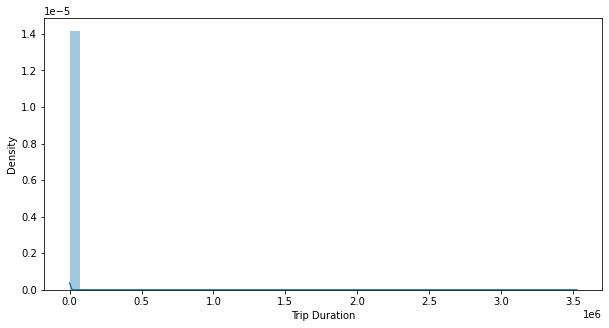

In [148]:
# 'trip_duration' a dependent variable 
plt.figure(figsize = (10,5))
sns.distplot((data['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

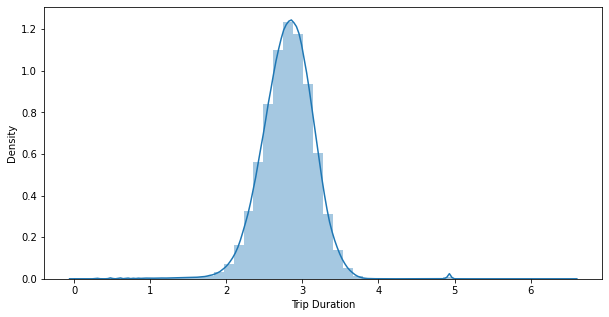

In [149]:
# This shows right skewness, hence apply the log10 to transform it to the normal distribution.
plt.figure(figsize = (10,5))
sns.distplot(np.log10(data['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

its observed that trip_duration is normally distributed.

Plot the boxplot and check for Outliers

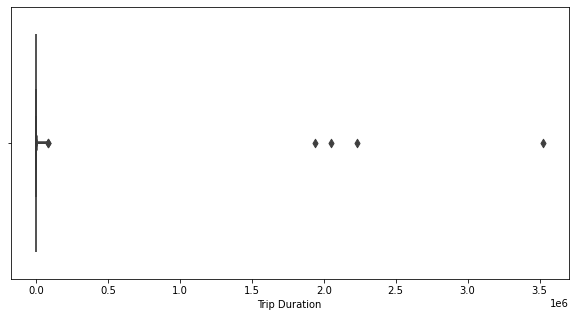

In [150]:
plt.figure(figsize = (10,5))
sns.boxenplot(data.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

Outliers are present and should be removed for the data consistency.

In [151]:
# checking for Outliers and removing them 
# Calculating 0-100 percentille to detect a correct percentile value for the removal of outlier.
for i in range(0,100,10):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [152]:
# Some inconsistency has been observed in 90-100,
# we will further dig into 90-100 percentile to analyse the data and check for the outliers in order to remove

for i in range(90,100):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


Visualization of Number trips taken with respect to trip duration

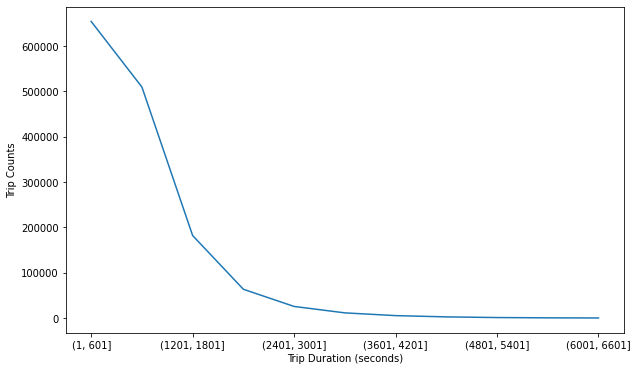

In [153]:
# Visualization of Number trips taken with respect to trip duration
plt.figure(figsize = (10,6))
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,600))).count().plot(kind='line')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Counts' )
plt.show()

As per the above observation, most of the trip duration is completed in 1 hour(3600 seconds).

As per the above observation a very few trips have duration more than 5000 seconds and some are with as low as 1 second(0 km distance)

In [154]:
# To maintain the data consistency, we will remove these outliers,
# (trips with duration more than 5000 seconds and less than 60 seconds) 
data = data[data.trip_duration <= 5000]
data = data[data.trip_duration >= 60]

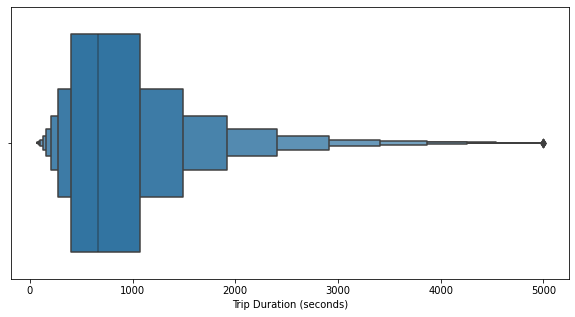

In [155]:
# Plotting for insights
plt.figure(figsize = (10,5))
sns.boxenplot(data.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

Most of the trips durations took between 10-20 mins to complete.
As observed most of the trips took 0 - 30 mins to complete(1800 seconds)

Also check for other variables

##Passenger count

Before analysing the passenger count, we know that its impossible to have more than 6 passengers in a Cab Or Zero passengers in Booked cab, so its time to define or remove the rows which have 0 or more than 6 passenger count.

In [ ]:
# Assuming the passenger count. If any, removing the rows which have Zero(0) or more than 6 passenger count.
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

# Passenger count
plt.figure(figsize = (10,6))
sns.kdeplot(x='passenger_count',data=data)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()


As per above observations, it is to be noted that highest amount of trips were taken by a single passenger and large group of people travelling together is rare compared to single passenger.

## Slotwise trips per Day



In [ ]:
# Trips per time_slots
plt.figure(figsize = (10,5))
sns.countplot(x="PickupTime_of_day", data=data)
plt.title('Pickup Time of Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

Evenings are the busiest and top among  the all.

## Trips per hour

In [ ]:
# Analyzing the trips per hour
plt.figure(figsize = (10,5))
sns.countplot(data.Hour_of_Pickup)
plt.xlabel('Time of pickup (24hr format)')
plt.show()

6:00 pm to 7:00 pm were the busiest hours, which makes sense as this is the time for people to return home from school/work.



## Trips per week day

In [ ]:
# Analyzing the trips per week day
plt.figure(figsize = (10,5))
sns.countplot(data.pickup_day)
plt.xlabel('Day of Pickup')
plt.ylabel('Pickup counts')
plt.show()

As observed above, Fridays are the busiest followed by Saturday and it may be because of weekend.



##  Trips per month

In [ ]:
# Analyzing the trips per month
plt.figure(figsize = (10,5))
sns.countplot(data.month)
plt.ylabel('Trip Count')
plt.xlabel('Months (Jan=1 to June=6) ')
plt.show()

No variance or not much difference between months.


## Store and Forward Flag

In [ ]:
## Analyzing the store and forward flag
data['store_and_fwd_flag'].value_counts(normalize=True)

As per the above observation only 1% of the trip details were stored in the vehicle memory first before sending it to the server and this might have occured due to of GPS or mobile device issues or battery was down when the trip finished.





## Distance

In [ ]:
# Analyzing the Distance
data['distance'].value_counts()

lets have a look at the boxplot.

In [ ]:
plt.figure(figsize = (10,6))
sns.boxenplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

*   There are some trips with over 100 km distance and some trips with 0 km distance.

The possible reasons for zero km trips can be:
*   The dropoff location couldn’t be tracked.
*   The passengers or driver cancelled the trip due to some or issue technical issue in software, etc.

In [ ]:
# Removing the outliers and updating the value
data = data[~(data.distance > 100)]
data = data[~(data.distance < 1)]

#Plotting the Boxenplot
plt.figure(figsize = (10,5))
sns.boxenplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

## Speed

In [ ]:
# Speed value counts
data['speed'].value_counts()

In [ ]:
# Largest value of speed
data['speed'].nlargest(10)

plotting the boxplot for better understanding.

In [ ]:
# Plotting boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data.speed)
plt.xlabel('Average Speed')
plt.show()

*   Some trips were done at a speed of over 100 km/h.





As per the rule, the speed limit approx. 40km/h in New York City.
So having average speed of over 60km/h is quite unreasonable.

In [ ]:
# Averge speed less than 60
data = data[~(data.speed >60)]

In [ ]:
## look at the smallest speeds as well.
print( data['speed'].nsmallest(10))

Some observations showing that speeds which are less than 1 km/hr for a trip which is quite unreasonable.

In [ ]:
# Removing the data with less than avg 1km speed
data = data[~(data.speed <1)]

# Plotting of Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data.speed)
plt.xlabel('Average Speed')
plt.show()

## Speed range ditribution with the help of graph.

In [ ]:
# Speed range per trip count
plt.figure(figsize = (10,5))
data.speed.groupby(pd.cut(data.speed, np.arange(0,104,10))).count().plot(kind = 'line')
plt.ylabel('Trip count')
plt.xlabel('Speed (Km/H)')
plt.show()

*   Most of the trips are completed at a speed range of 10-20 km/h.



## Vendor Identifier

In [ ]:
# Analyzing the Vendor_id Variable
plt.figure(figsize = (10,5))
sns.violinplot(data.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

As per above observations, trips taken by both vendors not have much difference.

# New Section